In [37]:
# in this example instead of predicting the GPA based on SAT, we want to predict admission based on SAT

# single logistic regression

In [38]:
# import the relevant libraries
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # to override matplotlib settings with the beautiful seaborn ones

In [39]:
# load the data
raw_data = pd.read_csv('F:\\schulich\python\\Udemy Data course\\required data files\\2.01. Admittance.csv')
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [40]:
# for quantitative analysis we need to quantify yes or no to numbers 1 and 0
quantified_data = raw_data.copy()
quantified_data['Admitted'] = quantified_data['Admitted'].map({'Yes': 1, 'No': 0})
quantified_data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [41]:
# declare variables X and Y
Y = quantified_data['Admitted']
X1 = quantified_data['SAT']

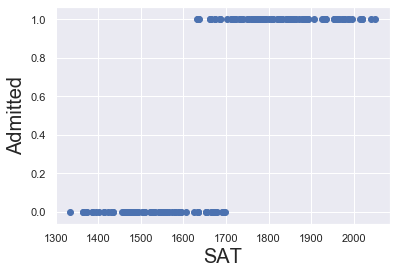

In [42]:
# let's plot the data
plt.scatter(X1, Y, color='C0')
plt.xlabel('SAT', fontsize =20)
plt.ylabel('Admitted', fontsize=20)
plt.show()
# the plot is strange, when we are deali0ng with categorical data

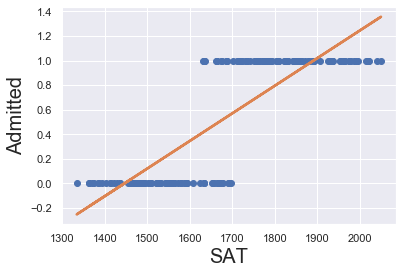

In [43]:
# let's do the regression using statsmodels
X = sm.add_constant(X1)
reg_linear = sm.OLS(Y, X)
results_linear = reg_linear.fit()

plt.scatter(X1, Y, color='C0')
Y_hat_linear = X1*results_linear.params[1]+results_linear.params[0]
plt.plot(X1, Y_hat_linear, lw=2.5, color='C1')
plt.xlabel('SAT', fontsize =20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

In [44]:
# the above regression is not good for this kind of analysis, because:
# 1. it does not know that our output values are between zero and 1
# 2. the line is awful fit
# 3. one of the assumptions of the linear regression, is linearity which is violated here.it is nonlinear. 

In [45]:
# lets do the logistic regression
# the steps are similar to linear regression by stasmodels
# first, as before we must add a constant. 
X = sm.add_constant(X1)
reg_log = sm.Logit(Y, X) # insted of OLS method in linear regression, we use Logit (L capital) in this case
# fit the regression
reg_log = reg_log.fit() 
# we get a message, telling us the function value and the number of iterations. 
# if the number of iterations is above 35 we get a run time error. 
# as in 

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [46]:
reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Jul 2020   Pseudo R-squ.:                  0.7992
Time:                        12:29:50   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Interpreting the above summary


In [47]:
# the method is MLE (Maximum Likelihood Estimation)
# Likelihood function: a function that estimates how likely it is the the model at hand describes the real
# underlying relationship of the variables.
# in simple words: The bigger the likelihood function, the higher the probability that our model is correct.
# you can then go to study the statistical and mathematical logic behind it.
# MLE tries to maximize the likelihood function.
# number of iterations means that the computer is trying different values until it reaches the value that 
# maximizes the likelihood function. when it can no longer improve it, it will just stop the optimization.
# that is also how any typical machine learning goes. 
# the other new term in the above summary is 'Log-Likelihood'. it is much more convinient to use 
# log likelihood instead of likelihood  when performing MLE.
# LL-Null: Log Likelihood Null: the likelihood of the model which has no independent variables. we calculate it
# to compare it with our log likelihood to see how much differnce our model has created. this difference show the 
# explanatory power of our model. if they are the same, so our model's explanatory power is low. 
# the question is how we use the difference to see if the model is useless or not, LLR p-vale (Log Likelihood Ratio test)
# helps us with that, the lower the p-value, the more significant our model is, in this example LLR p-value = 0.000 so our model is significant.
# Pseudo R-squared: similar but not the same as R-squared in linear regression. usefull for comparing variations of the same
# model, so different models will have completely different and incomparable Pseudo R squares. 

# interpreting the second part of the table: coefficinets
$ log{\frac{P(X)}{1-P(X)}} = b_kX + b_0 =>$ 
$ log{\frac{odds_2}{odds_1}} = {{b_k}*{(X_2-X_1)}} =>$
$ \frac{odds_2}{odds_1} = e^{{b_k}*{(X_2-X_1)}} =>$
$ odds_2 = e^{{b_k}*{(X_2-X_1)}}*odds_1 $

In [48]:
# the above formula shows that id SAT increases by 1 score, we will have e^(0.042*(1-0)) = 1.43, so its odds 
# of admittance increases by 43%. for each unit change in a varible the change in its odd is e^(bk)

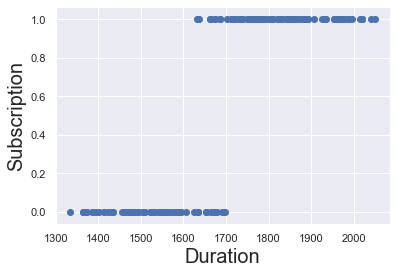

In [49]:
# Create a scatter plot of x1 (Duration, no constant) and y (Subscribed)
plt.scatter(X1,Y,color = 'C0')

# Don't forget to label your axes!
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


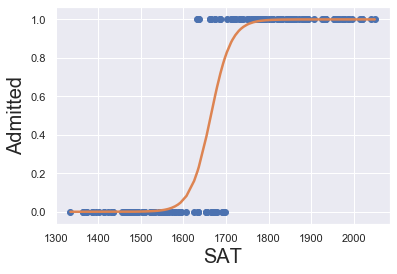

In [50]:
# plot with a logistic regression curve:
# the below codes are just to show the results, we will discuss them in more details later.

reg_logistic = sm.Logit(Y, X)
results_logistic = reg_logistic.fit()

# define the logistic function
def f(X, b0, b1):
    return np.array((np.exp(b0 + b1*X)) / (1 + np.exp(b0 + b1*X)))
        
f_sorted = np.sort(f(X1, results_logistic.params[0], results_logistic.params[1]))
X_sorted = np.sort(np.array(X1))

plt.scatter(X1, Y, color='C0')
plt.plot(X_sorted, f_sorted, lw=2.5, color='C1')
plt.xlabel('SAT', fontsize =20)
plt.ylabel('Admitted', fontsize=20)
plt.show()


In [51]:
# as you see we solved the above problems of linear regression:
# 1. it's outcomes are bounded to 0 and 1
# 2. the relationship is non linear rather than linear,
# 3. it fits the model way better. 

# logistic regression with one numerical and one binary independent variable

In [52]:
# import the relevant libraries
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # to override matplotlib settings with the beautiful seaborn ones


In [53]:
# load the data
raw_data = pd.read_csv('F:\\schulich\python\\Udemy Data course\\required data files\\2.02. Binary predictors.csv')
raw_data.head()

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


In [54]:
# as admitted and gender are categorical variables, we must quatify them to 0 and 1
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data['Gender'] = data['Gender'].map({'Female': 1, 'Male': 0})
data.head()

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0


In [55]:
# declare the dependent and the independent variables
# let ignore SAT and only set our model base on Gender
Y = data['Admitted']
X1 = data['Gender']

In [56]:
# Regression
X = sm.add_constant(X1)
reg_only_Gender_log = sm.Logit(Y, X)
results_only_Gender_logistic = reg_only_Gender_log.fit()
results_only_Gender_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Jul 2020   Pseudo R-squ.:                  0.1659
Time:                        12:30:18   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6436      0.222     -2.901      0.004      -1.078      -0.209
Gender         2.0786      0.363      5.727      0.000       1.367       2.790
==============================================================================
"""

In [57]:
# LLR p-value = 0.000 so the model is significant
# Gender P > |z| = 0.000 so the Gender variable is significant too
# log(odds) = -0.64 + 2.0786*Gender => 

### interpreting the second part of the table: coefficinets
$ log{\frac{P(X)}{1-P(X)}} = 2.08X - 0.64 =>$ 
$ log{\frac{odds_2}{odds_1}} = {{2.08}*{(Gender_2-Gender_1)}} =>$
$ \frac{odds_2}{odds_1} = e^{{2.08}*{(Gender_2-Gender_1)}} =>$
$ odds_2 = e^{{2.08}*{(Gender_2-Gender_1)}}*odds_1 $
### we have only two genders, and gender2 - gender1 = 1 - 0 = 1
$ odds_{female} = e^{{2.08}*{1}}*odds_{male} => $
$ odds_{female} = 8 * odds_{male} $
#### The odds of a female to get admitted is 8 times the odds of a male to get admitted.

In [58]:
# as we know there is a srtong relationship between SAT score and admittance
# so we run the regression this time with both gender and SAT
Y = data['Admitted']
X1 = data[['SAT', 'Gender']]

In [60]:
X = sm.add_constant(X1)
reg_log = sm.Logit(Y, X)
results_logistic = reg_log.fit()
results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Tue, 07 Jul 2020   Pseudo R-squ.:                  0.8249
Time:                        12:31:07   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [61]:
# as you know its log-likelihood is much higher, -20.180 vs -96.140, meaning that this model is a better one, which make
# sense as SAT is an outstanding predictor. 
# the gender is still significant 0.022<0.05, but no as significant as the previous model. as you see the coefficent of 
# Gender in this model is 1.9449, and e^1.9449 = 7. so it means that between a male and a female with the same SAT, the
# odds of the female one to get admitted is 7 times higher than that of the male one.
np.exp(1.9449)
# in this specific university it is much easier for females to get admitted. in reality it happens alot. for example STEM
# (science, Technology, Engineering, Mathematics) fields are predominated by male, and the universiy is willing to make the
# admission easier for female for the sake of equality. and the opposit in communication fields.
# so always interpret the results considering the context. 

6.992932526814459

### calculating the accuracy of the model

In [62]:
# in oreder to measure the accuracy of our model we have pseudo R-squared that gives us some sense to know how well our 
# regression model is. but there is a really better way, as we have our predictions and our real target. so we can compare
# them and then get the ratio of the number of correct predictiosn to total number of our observations as accuray percent.

In [63]:
# let get the predicted values by our model

# lets apply some formatting to make it more legible
np.set_printoptions(formatter={'float' : lambda x: '{0:0.2f}'.format(x)})

predictions = results_logistic.predict()
predictions

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [64]:
# the number above are 0s, 1s, and some other numbers between 1 and zero, these numbers are probabilities: 
# the probability of being admitted.

In [65]:
# we need our actual values also to make comparison
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [66]:
len(predictions)

168

In [67]:
# so as our actual values are only zero and one, we need to round our above numbers. 
# numbers below 0.5 would be zero, and above would be 1. 
# lets do it
for i in range(0, 167, 1):
    if predictions[i] <= 0.5:
        predictions[i] = 0 
    else:
        predictions[i] = 1 
predictions

array([0.00, 1.00, 1.00, 0.00, 0.00, 1.00, 1.00, 1.00, 1.00, 0.00, 1.00,
       1.00, 1.00, 0.00, 1.00, 1.00, 0.00, 0.00, 1.00, 1.00, 1.00, 1.00,
       0.00, 0.00, 1.00, 1.00, 0.00, 1.00, 1.00, 1.00, 0.00, 1.00, 0.00,
       1.00, 1.00, 1.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00,
       1.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 1.00, 1.00, 0.00, 1.00,
       0.00, 0.00, 1.00, 0.00, 1.00, 0.00, 1.00, 1.00, 1.00, 1.00, 0.00,
       0.00, 0.00, 1.00, 0.00, 1.00, 0.00, 0.00, 1.00, 1.00, 1.00, 0.00,
       0.00, 1.00, 1.00, 0.00, 1.00, 1.00, 1.00, 1.00, 1.00, 0.00, 1.00,
       1.00, 1.00, 1.00, 0.00, 1.00, 1.00, 0.00, 1.00, 1.00, 0.00, 1.00,
       1.00, 1.00, 0.00, 1.00, 0.00, 0.00, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 1.00, 0.00, 1.00, 1.00, 1.00,
       0.00, 0.00, 0.00, 1.00, 0.00, 1.00, 1.00, 1.00, 1.00, 1.00, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 1.00, 1.00, 1.00,
       1.00, 1.00, 0.00, 0.00, 0.00, 0.00, 1.00, 1.

In [68]:
results_logistic.pred_table()
# note that even if we did not round predictions to 0 and 1, the pred_table automatically would do that for us. 

array([[69.00, 5.00],
       [4.00, 90.00]])

In [69]:
# let's format it 
ConfusionMatrix_DataFrame = pd.DataFrame(results_logistic.pred_table())
ConfusionMatrix_DataFrame.columns = ['Predicted 0', 'Predicted 1']
ConfusionMatrix_DataFrame = ConfusionMatrix_DataFrame.rename(index = {0: 'Actual 0', 1: 'Actual 1'})
ConfusionMatrix_DataFrame
# the below table is called confusion matrix, because it shows how confused our model was. 

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [71]:
# using the above matrix we can easily calculate accuracy: number of correct predictions divided by the 
# total number of observations : accuracy = (69+90)/(69+5+4+90) = 0.946 = 94.6%
Confusion_array =np.array(ConfusionMatrix_DataFrame)
accuracy_train = (Confusion_array[0,0]+Confusion_array[1,1])/Confusion_array.sum()
accuracy_train

0.9464285714285714

### Test the model using test data set

In [74]:
# assume that we have 19 new observation that did not exist in our primary data set, which was not used to train our model.
# swo we consider the as our test data. 
# lets upload it:
raw_data_test = pd.read_csv('F:\\schulich\python\\Udemy Data course\\required data files\\2.03. Test dataset.csv')
raw_data_test

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male
5,1556,Yes,Female
6,1731,Yes,Female
7,1809,Yes,Female
8,1930,Yes,Female
9,1708,Yes,Male


In [75]:
# 1- we will use our model to make predictions based on the test data
# 2- we will compare those with the actual outcome
# 3- calculate the accuracy_test
# 4- create a cofusion matrix

In [77]:
# for quantitative analysis we need to quantify yes or no to numbers 1 and 0
quantified_data_test = raw_data_test.copy() # we do not want to lose our original data (always keep a copy of your original data)
quantified_data_test['Admitted'] = quantified_data_test['Admitted'].map({'Yes': 1, 'No': 0})
quantified_data_test['Gender'] = quantified_data_test['Gender'].map({'Female': 1, 'Male': 0})
quantified_data_test.head()

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0


In [78]:
X  # X= X_train : because we want to see the order of features

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0
...,...,...,...
163,1.0,1722,1
164,1.0,1750,0
165,1.0,1555,0
166,1.0,1524,0


In [79]:
# this is the actual values for Y in our test data base
test_actual_values = quantified_data_test['Admitted']
test_actual_values

0     0
1     1
2     1
3     1
4     0
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    0
14    0
15    1
16    0
17    0
18    1
Name: Admitted, dtype: int64

In [82]:
# we have X which actually is X_train, now we need to create X_test, which have to be in the same format as X (X_train) 
# they have to have the same order of columns similar to X

X1_test = quantified_data_test.drop(['Admitted'], axis= 1)
X_test = sm.add_constant(X1_test)
X_test

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0
5,1.0,1556,1
6,1.0,1731,1
7,1.0,1809,1
8,1.0,1930,1
9,1.0,1708,0


In [89]:
# as for data_test we can not use pred_table method, we need to do it manually by using the below function:

def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: X_data : data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: test_actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins = np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and accuracy
        return cm, accuracy

In [91]:
cm = confusion_matrix(X_test, test_actual_values, results_logistic)
cm

(array([[5.00, 1.00],
        [1.00, 12.00]]), 0.8947368421052632)

In [100]:
# the accuracy_test of the model = 89.4% 
# almost always the accuracy_train is higher than accuracy_test

In [103]:
# let's format the confusion matrix
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0', 1: 'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,1.0,12.0


In [112]:
# the opposite of accuracy is called Missclassification rate = number of missclassified / number of all elements
# Missclassification rate = 1 - accuracy rate
Confusion_array_test =np.array(cm_df)
Misclassification_rate_test = (Confusion_array_test[0,1]+Confusion_array_test[1,0])/Confusion_array_test.sum()
print('Misclassification Rate Test =', Misclassification_rate_test)

Misclassification Rate Test = 0.10526315789473684
